# Electric Vehicle Sales by State in India - Data Analysis Project

This project is part of my internship with Unified Mentor. The aim of this project is to analyze the electric vehicle (EV) sales across various states in India using Python (Jupyter Notebook). This analysis includes loading the dataset, cleaning the data, performing exploratory data analysis (EDA), and visualizing trends and patterns to derive meaningful insights.


In [80]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set default styles
sns.set(style="whitegrid")
%matplotlib inline

In [82]:
# Load the dataset
df = pd.read_csv("Electric Vehicle Sales by State in India.csv")

In [ ]:
# Display the first few rows
df.head(2)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0


In [84]:
df.tail(2)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0


Data Understanding

In [85]:
# Basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [86]:
# Check for null values
df.isnull().sum()


Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [87]:
# Dataset shape (rows, columns)
df.shape


(96845, 8)

In [88]:
# Check unique states and years
print("States:", df['State'].nunique())
print("Years:", df['Year'].unique())


States: 34
Years: [2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022. 2023. 2024.]


Data Cleaning

In [89]:
# Standardize column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [90]:
# Handle missing values if any (here we just drop them for simplicity)
df.dropna(inplace=True)

In [91]:
# Convert 'Year' column to integer if it's not already
df['Year'] = df['Year'].astype(int)

In [93]:
# Check cleaned dataset
df.head(3)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0


Exploratory Data Analysis (EDA)


In [ ]:
# Total EVs sold per year
sales_per_year = df.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()

In [97]:
sales_per_year

,Year,EV_Sales_Quantity
0,2014,2392.0
1,2015,7805.0
2,2016,49855.0
3,2017,87420.0
4,2018,130254.0
5,2019,166819.0
6,2020,124684.0
7,2021,331498.0
8,2022,1024723.0
9,2023,1525179.0


In [108]:
# Top 10 states by total EV sales
top_states = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)

In [99]:
top_states

State
Uttar Pradesh    732074.0
Maharashtra      401535.0
Karnataka        315498.0
Delhi            268538.0
Rajasthan        228573.0
Bihar            213465.0
Tamil Nadu       206902.0
Gujarat          176713.0
Assam            151917.0
Kerala           133246.0
Name: EV_Sales_Quantity, dtype: float64

In [101]:
# States with consistent growth (optional)
growth_states = df.groupby(['State', 'Year'])['EV_Sales_Quantity'].sum().reset_index()

In [102]:
growth_states.head()

,State,Year,EV_Sales_Quantity
0,Andaman & Nicobar Island,2014,0.0
1,Andaman & Nicobar Island,2015,0.0
2,Andaman & Nicobar Island,2016,0.0
3,Andaman & Nicobar Island,2017,0.0
4,Andaman & Nicobar Island,2018,20.0


Visualizations

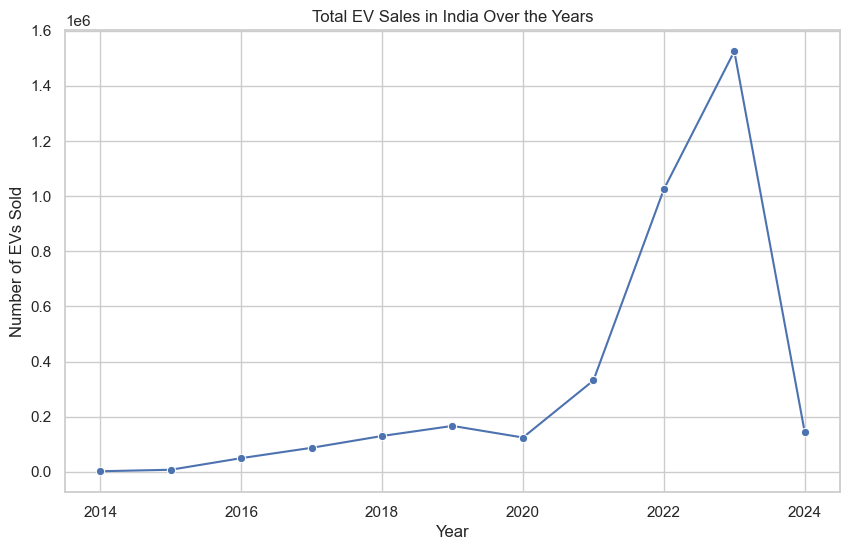

In [103]:
# EV Sales Over Years
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_per_year, x='Year', y='EV_Sales_Quantity', marker='o')
plt.title('Total EV Sales in India Over the Years')
plt.ylabel('Number of EVs Sold')
plt.xlabel('Year')
plt.grid(True)
plt.show()


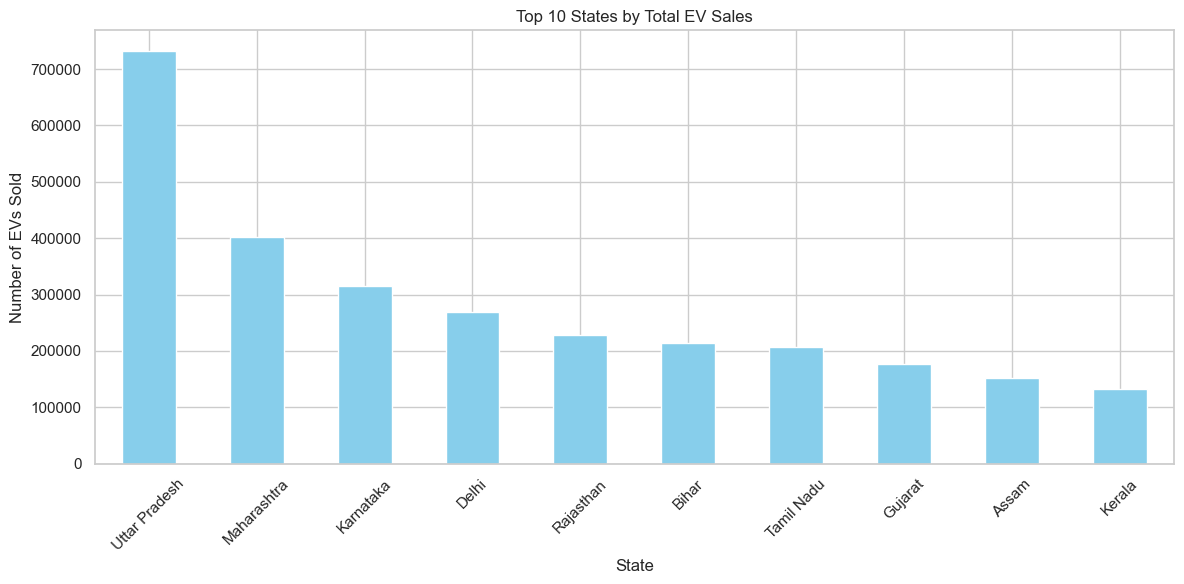

In [ ]:
# Top 10 States with Highest EV Sales
plt.figure(figsize=(12, 6))
top_states.plot(kind='bar', color='skyblue')
plt.title('Top 10 States by Total EV Sales')
plt.ylabel('Number of EVs Sold')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

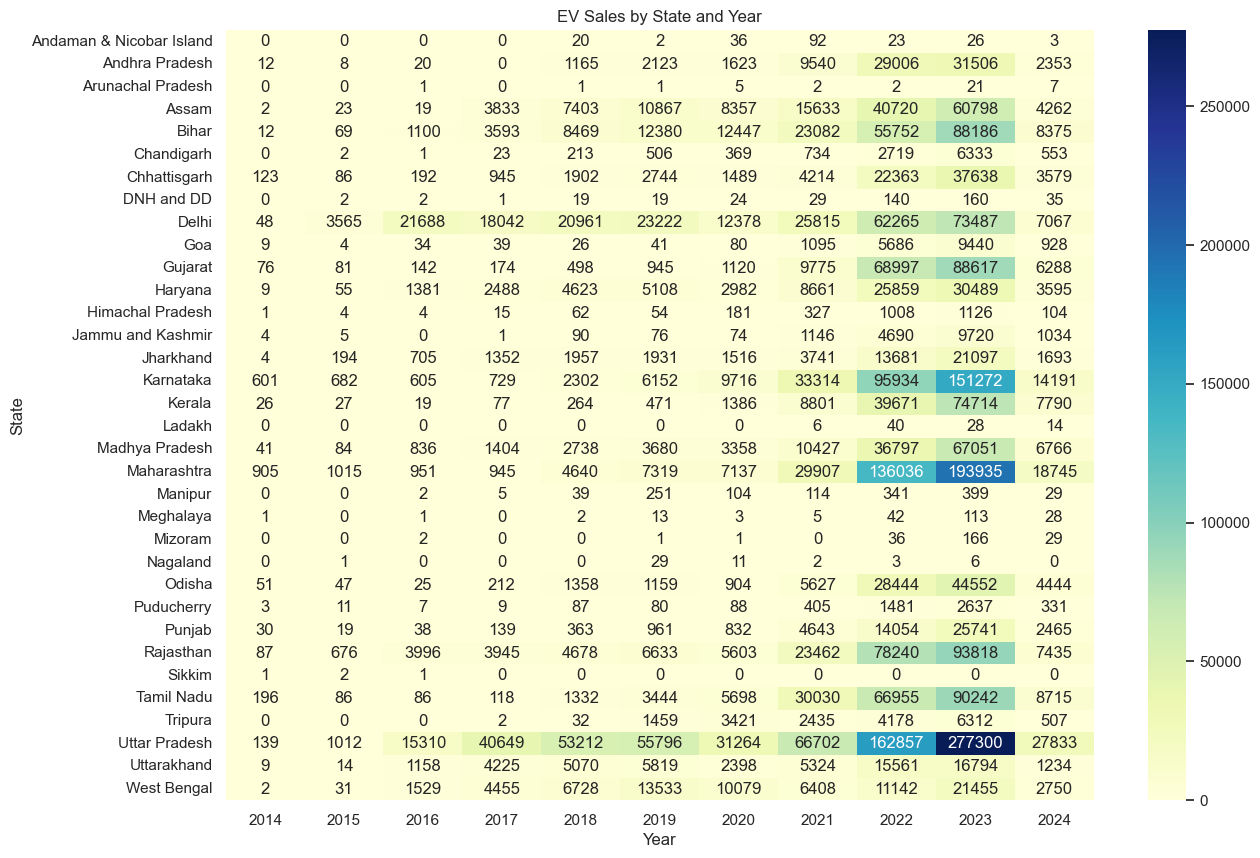

In [ ]:
# Heatmap of EV Sales by State and Year
pivot_table = df.pivot_table(values='EV_Sales_Quantity', index='State', columns='Year', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('EV Sales by State and Year')
plt.show()

# Key Insights

1. The total EV sales in India have been increasing steadily year over year.
2. A few states dominate EV sales, with top contributors being Delhi, Maharashtra, and Karnataka.
3. Some states are showing significant growth year-on-year, indicating increased adoption of electric mobility.
4. States like Bihar and Assam have relatively lower EV adoption rates compared to others.